In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#

In [2]:
df = gpd.read_parquet('ocsge_2022_carreaux_1000m.parquet')

In [13]:
df['CS1_1'] = df['CS1_1'] * 100
df['CS1_2'] = df['CS1_2'] * 100
df['CS2_1'] = df['CS2_1'] * 100
df['US1_1'] = df['US1_1'] * 100

C:\Users\francois.semecurbe\AppData\Local\anaconda3\Lib\site-packages\mapclassify\classifiers.py:1653: UserWarning: Not enough unique values in array to form 20 classes. Setting k to 19.
  self.bins = quantile(y, k=k)


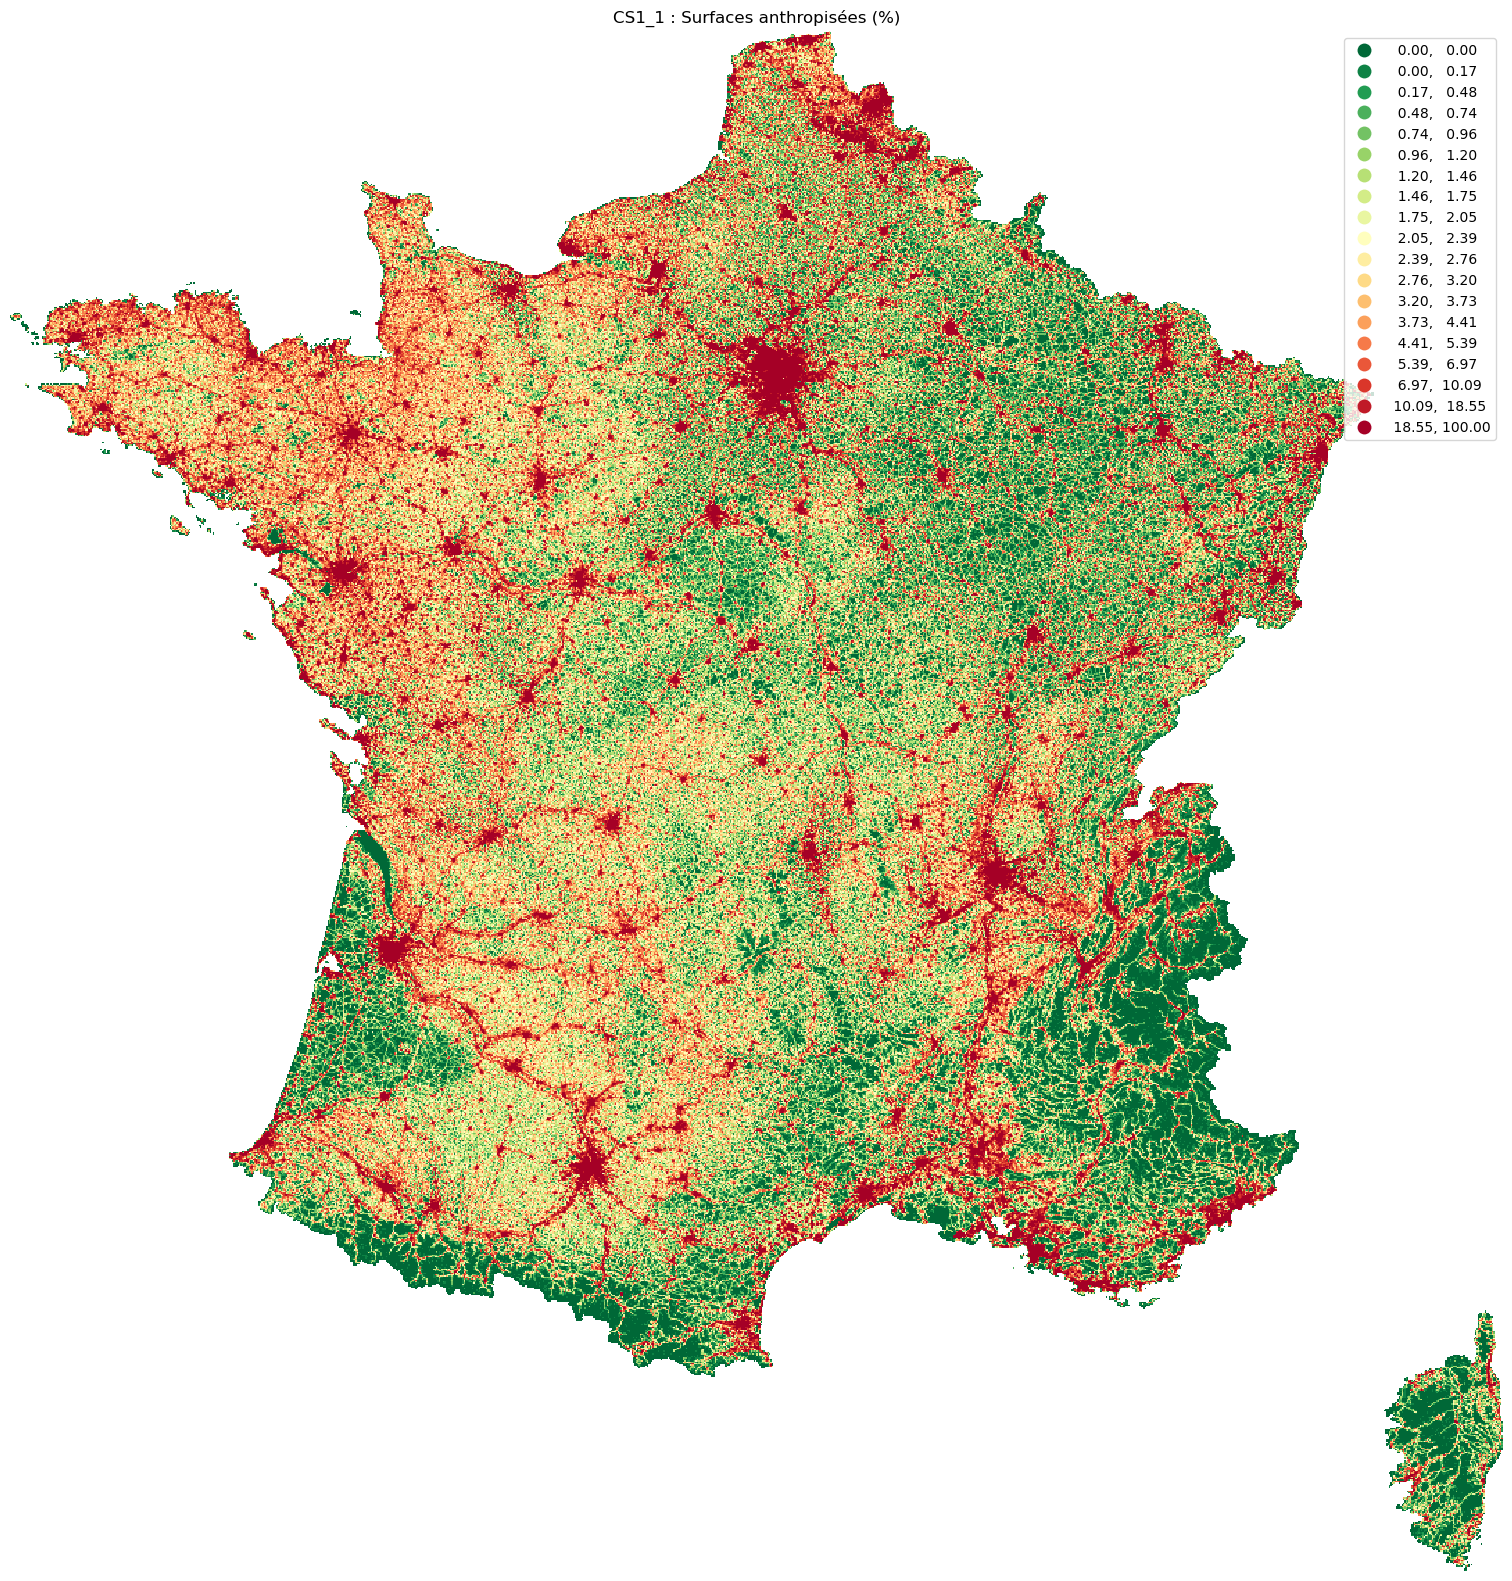

In [33]:
ax = df.plot('CS1_1', figsize=(20,20), cmap='RdYlGn_r', scheme='quantiles', legend=True, k=20)
ax.set_title('CS1_1 : Surfaces anthropisées (%)')
ax.set_axis_off();
ax.margins(0)
plt.savefig('CS1_1.png', bbox_inches="tight", pad_inches=0)

### carte de l'artificialisation

In [58]:
cols = []
for cs in ['CS2_2_1' ]:
    for us in ['US2', 'US3', 'US5', 'US4_1_1', 'US4_1_2', 'US4_1_3', 'US4_1_4', 'US4_1_5', 'US4_2', 'US4_3', 'US6_1', 'US6_2']:
        cols.append(cs + '_' + us) 

In [41]:
df.CS1_1_

Index(['id_carreau_1km', 'annee', 'surface', 'CS1_1', 'CS1_2', 'CS2_1',
       'CS2_2', 'CS1', 'CS2', 'CS1_1_1_1', 'CS1_1_1_2', 'CS1_1_2_1',
       'CS1_1_2_2', 'CS1_2_1', 'CS1_2_2', 'CS1_2_3', 'CS2_1_1_1', 'CS2_1_1_2',
       'CS2_1_1_3', 'CS2_1_2'],
      dtype='object')

In [59]:
df['Artif'] = ((df[cols + ['CS1_1_1_1', 'CS1_1_1_2', 'CS1_1_2_1', 'CS1_1_2_2']].sum(axis=1) - df.CS1_1_2_1_US1_3) / df.surface )# * 100

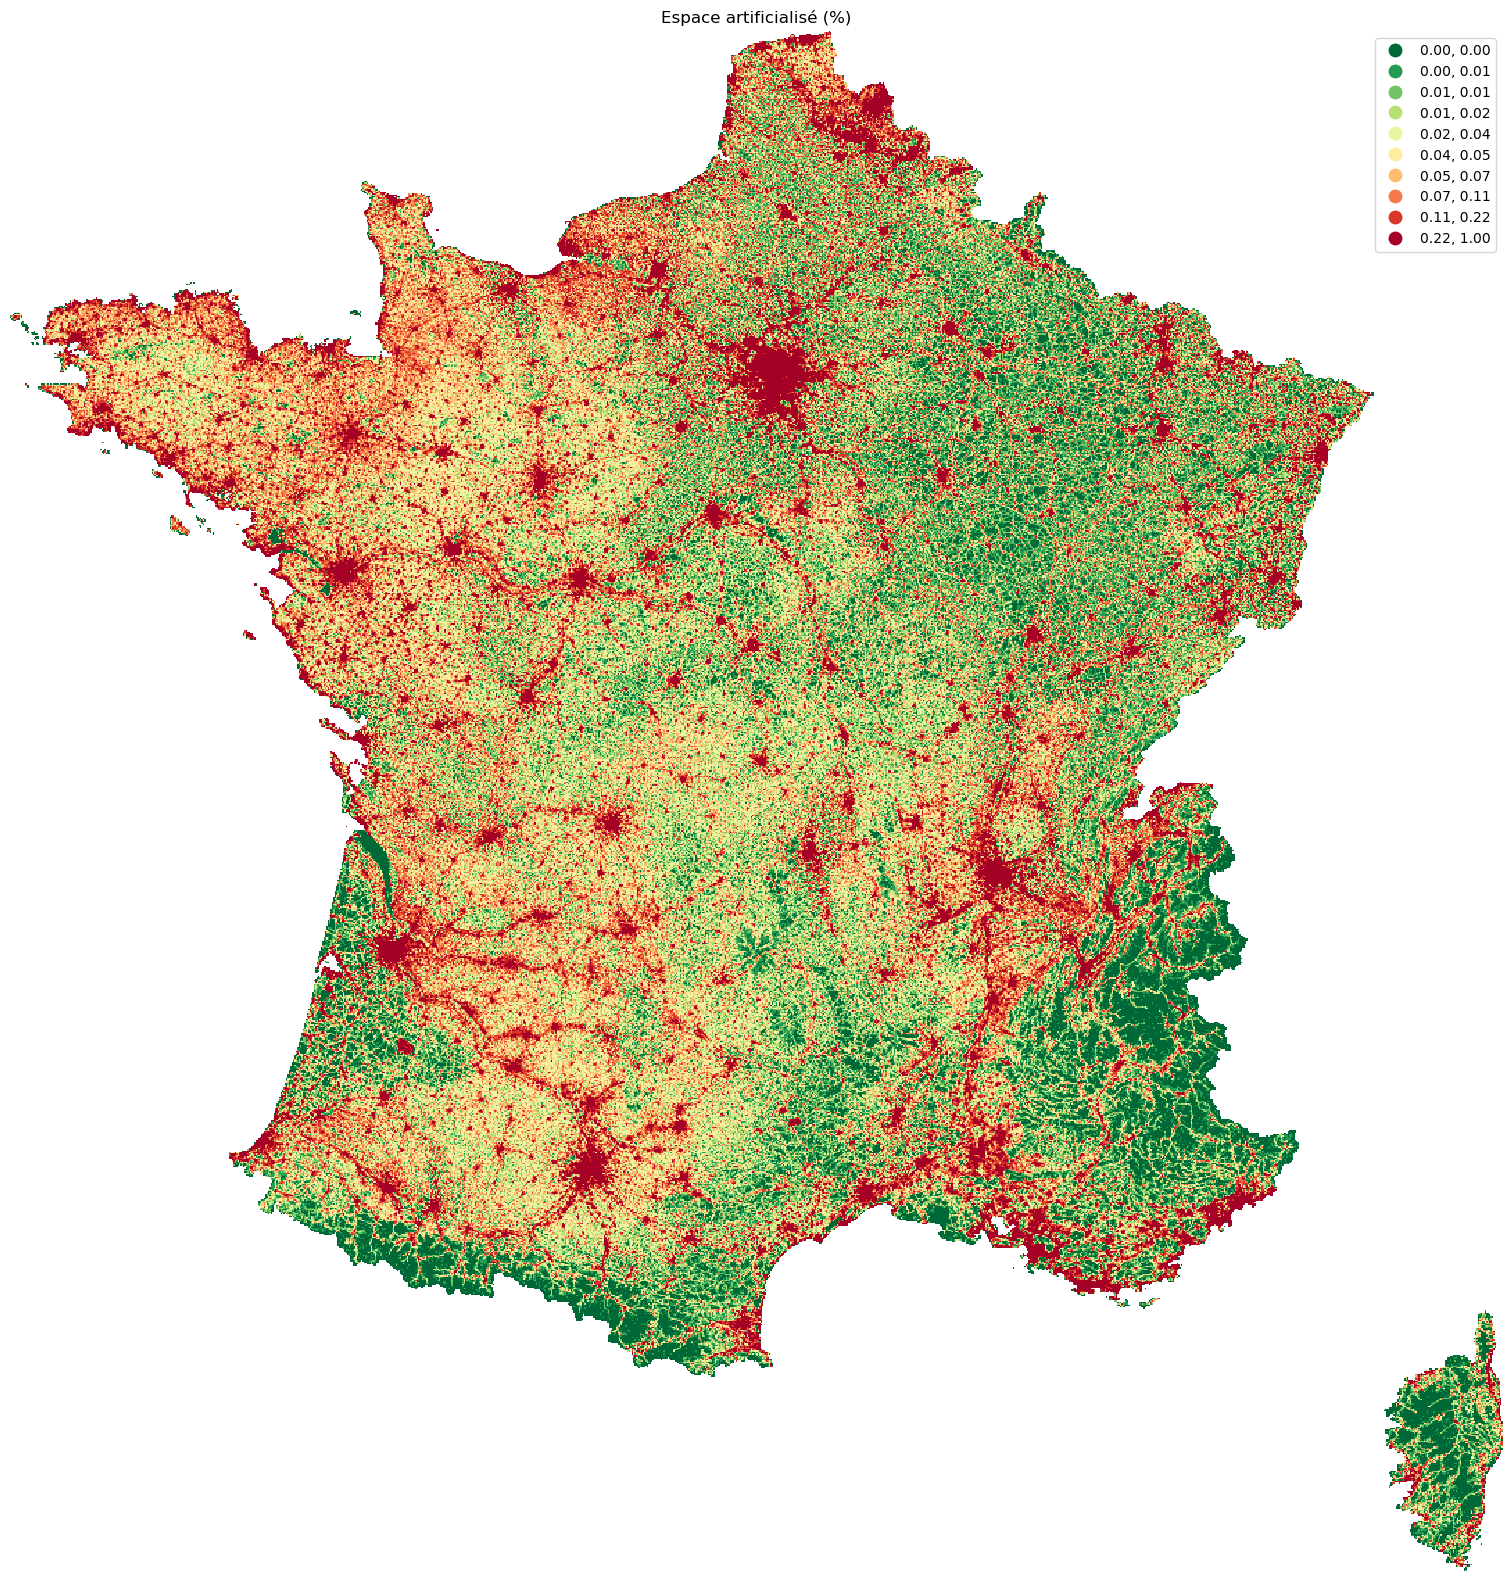

In [62]:
ax = df.plot('Artif', figsize=(20,20), cmap='RdYlGn_r', scheme='quantiles', legend=True, k=10)
ax.set_title('Espace artificialisé (%)')
ax.set_axis_off();
ax.margins(0)
#plt.savefig('Artif.png', bbox_inches="tight", pad_inches=0)

In [70]:
df['x'] = (df.geometry.centroid.x - 500).astype(int)
df['y'] = (df.geometry.centroid.y - 500).astype(int)

In [71]:
df[['x', 'y', 'Artif']].to_csv('Artif.csv', index=False)

### Carte agriculture

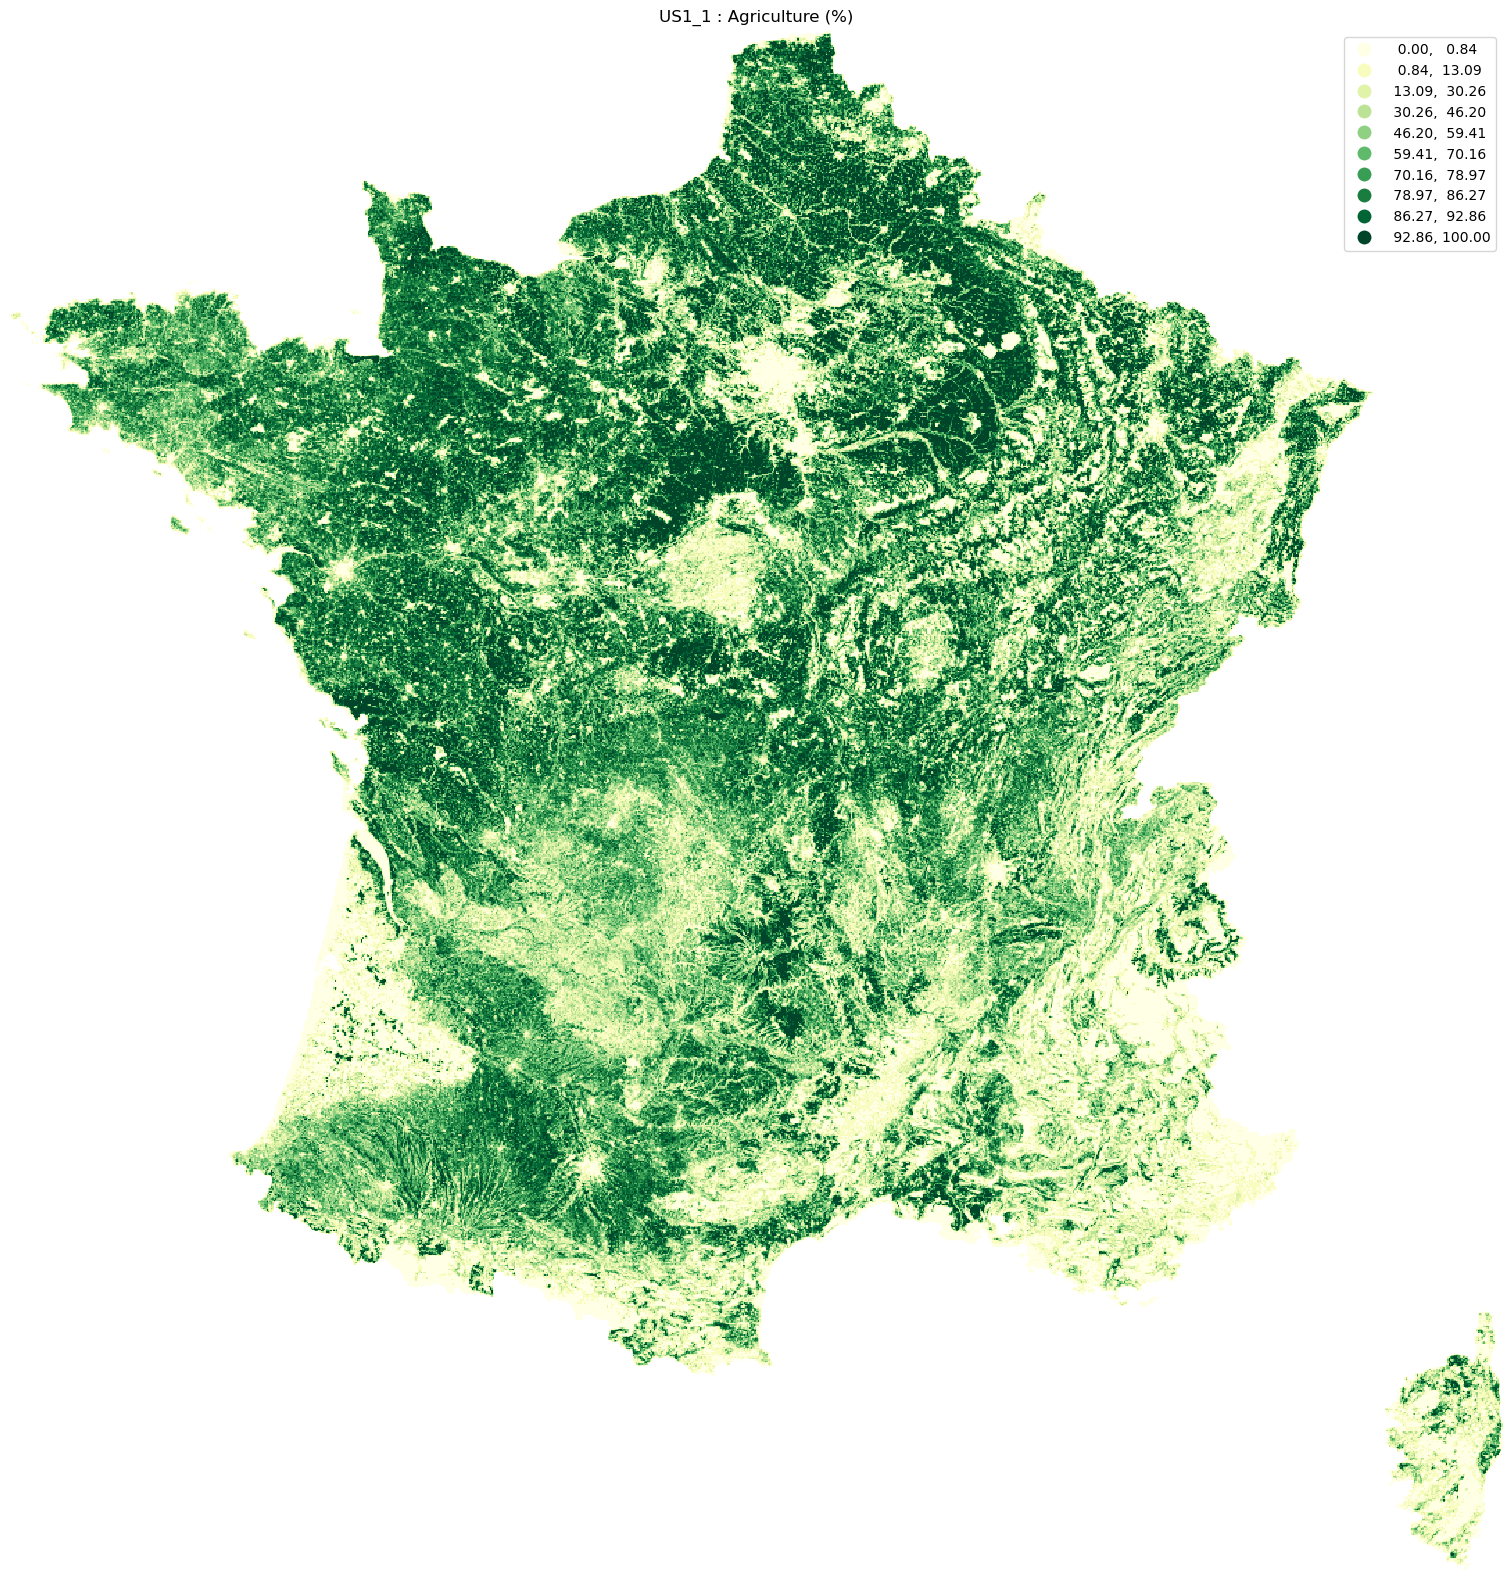

In [34]:
ax = df.plot('US1_1', figsize=(20,20), cmap='YlGn', scheme='quantiles', legend=True, k=10)
ax.set_title('US1_1 : Agriculture (%)')
ax.set_axis_off();
ax.margins(0)
plt.savefig('US1_1.png', bbox_inches="tight", pad_inches=0)

In [14]:
insee = gpd.read_file("carreaux_1km_met.gpkg")

In [15]:
insee = pd.merge(insee, df, on='id_carreau_1km')

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")

In [16]:
insee['CS1_1d'] = pd.cut(insee.CS1_1, [0, 25, 50, 75, 100])

In [17]:
pop = insee.groupby('CS1_1d', as_index=False)[['pop']].sum()

C:\Users\francois.semecurbe\AppData\Local\Temp\ipykernel_17496\3626163636.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop = insee.groupby('CS1_1d', as_index=False)[['pop']].sum()


In [18]:
pop['pop'] = pop['pop'] / np.sum(pop['pop']) * 100

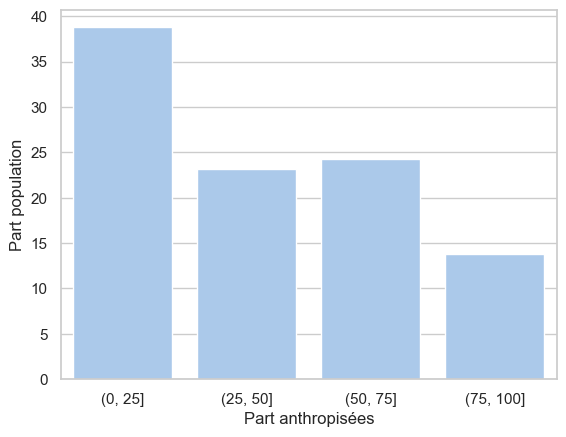

In [23]:
ax = sns.barplot(pop, x="CS1_1d", y="pop")
ax.set_xlabel("Part anthropisées")
ax.set_ylabel("Part population")
plt.savefig('popCS11.png', bbox_inches="tight", pad_inches=0)

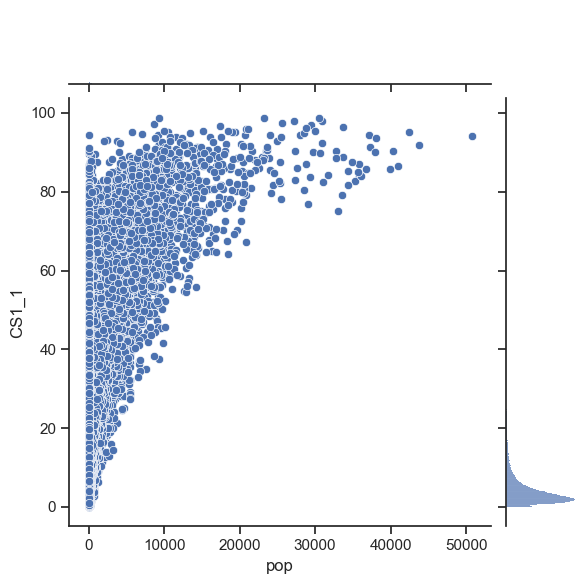

In [43]:
sns.jointplot(data=insee, x="pop", y="CS1_1")

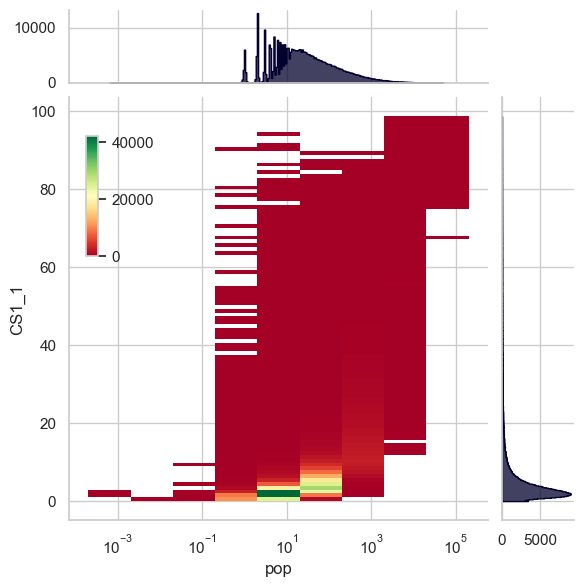

In [52]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

g = sns.JointGrid(data=insee, x="pop", y="CS1_1", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(xscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="RdYlGn", pmax=.8, cbar=True, cbar_ax=cax, bins=100
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

KeyboardInterrupt: 

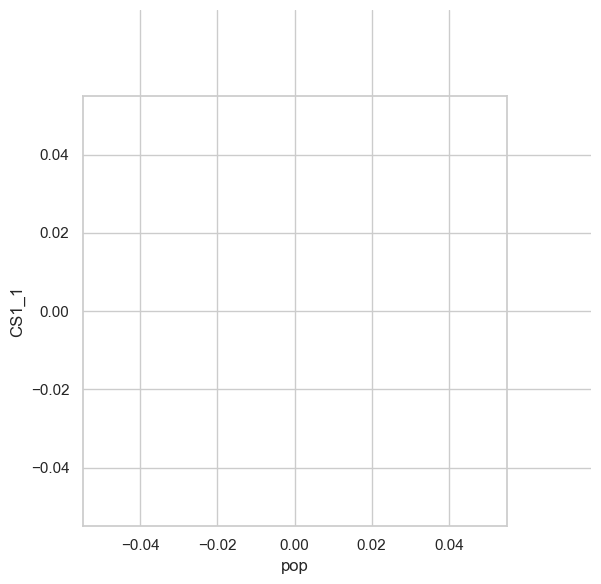

In [53]:
g = sns.JointGrid(data=insee, x="pop", y="CS1_1", space=0)
g.ax_joint.set(xscale="log")
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)